# Loading and preparing data for model fitting

In this notebook we focus on the data loading, basic exploring, and data prepatation. The output from this notebook will be a cleaned data set that we can use for model fitting that will be used later in another notebook. 

After reviewing and studying this material you should be able to:

1. Import and install python libraries
    * Anaconda has most of the libraries you'll need preloaded; but there are times you may need to install a new package.
2. Set the random seed (this ensures your work is repeatable)
    * For this course, always use 1 as your random seed. If you do not, then your results will differ from the ones used on the marking key and you will loose marks.
3. Load data
    * This can be from a database, website, file, or other. In this example we will load data from a csv (comma seperated value) file. 
4. Conduct basic evaluation of the data 
    * We want to get to know the data in the context of our problem. 
        * What is our target variable
        * Are there variables that we want to exclude from our model?
    * What types of data do we have?
      * Categorical (nominal, ordinal) or continuous (interval, ratio)
    * How many features and observations?
      * features = variables, they are the columns of data.
      * observations = rows of data
    * Do we see evidence of corrupt data?
      * Corrupt data can be indicated by outliers, misspelling, or other issues.
    * Do we see evidence of missing data?
      * Missing data will be seen as NaN (not a number) or None.
5. Process the data
    1. Conduct pre-split data cleaning
    2. Split data into training and test sets
    3. Conduct post-split data cleaning
6. Save the data (we'll start modeling it later)
    * save the cleaned data to a csv file. This will be used in a later notebook.
      * Save X_train, X_test, y_train, y_test in csv files. 

## About the Dataset

I have chosen the UCI Machine Learning Repository - Taiwanese Bankruptcy Prediction Data Set

IT industry firms are now receiving insurance through benefit programs from insurance companies. Recently, the insurance provider offered insurance to 6819 businesses. In the current environment, 220 businesses out of 6819 failed as a result of the economic crisis. Due to this crisis, the insurance company is struggling to pay the businesses on their insurance claims.


In order to prevent this in the future, I will be creating different modelling techniques to predict which gives the best results that will determine who should receive insurance in the future based on bankruptcy.

## 1.0 Import and install python libraries

Here we import any Python libraries that we plan to use. Any libraries that we import must be installed on your computer. Numpy and Pandas should be installed as part of Anaconda; but if you ever find yourself in a situation where you don't have the library installed, you can use the conda command from a terminal:

conda install -c conda-forge <package/library name you want to install>

For example:
conda install -c conda-forge numpy

In [1]:
# import numpy and pandas libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score ,f1_score,classification_report, make_scorer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.utils import resample
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

## 2.0 Set Random Seed

It's *very* important that you set this! In this course we will use the random seed value of 1.

In [2]:
# set random seed to ensure that results are repeatable
np.random.seed(1)

## 3.0 Load data 

One of the most common file formats for data is csv (comma seperated value). Pandas has a function called read_csv() that will load the data into a Pandas dataframe. 
NOTE: There are other file formats we can use. For instance:
* Excel files can be loaded using read_excel(). 
* json (JavaScript Object Notation). This is a very common format for web data. 
* Parquet files are a compressed file format that is very common in big data applications.
* For larger datasets you may want to use a database. Pandas has functions to connect to a database and load data.
* For extremely large datasets, you may want to use a distributed file system such as HDFS (Hadoop Distributed File System) or S3 (Amazon Simple Storage Service).

In [3]:
# load data
data = pd.read_csv("FinancialData.csv")

## 4.0 Conduct initial exploration of the data

In [4]:
# look at the data
data.head(3) 

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,370,424,405,601,601,998,796,808,302,...,716,9.0,622,601,827,290,26,564,1000,16
1,1,464,538,516,610,610,998,797,809,303,...,795,8.0,623,610,839,283,264,570,1000,20
2,1,426,499,472,601,601,998,796,808,302,...,774,40.0,623,601,836,290,26,563,1000,16


In [5]:
# generate a basic summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   int64  
 2    ROA(A) before interest and % after tax                   6819 non-null   int64  
 3    ROA(B) before interest and depreciation after tax        6819 non-null   int64  
 4    Operating Gross Margin                                   6819 non-null   int64  
 5    Realized Sales Gross Margin                              6819 non-null   int64  
 6    Operating Profit Rate                                    6819 non-null   int64  
 7    Pre-tax net Interest Rate                                6819 non-null   int64  
 8    After-tax net Int

In [6]:
# generate a statistical summary of the numeric value in the data
data.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.00000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,504.681478,558.129638,553.087549,607.44552,607.430415,998.339639,796.699223,808.665933,303.102948,...,807.264995,1.862942e+10,623.366476,607.444053,839.909518,279.867576,26.843672,564.969497,1000.0,47.073618
std,0.176710,60.689176,65.617481,61.593067,16.93854,16.921218,13.012728,12.865462,13.597442,11.168302,...,40.333972,3.764501e+11,12.293356,16.938457,14.522452,14.465542,15.686011,13.212757,0.0,50.013910
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.0,0.000000
25%,0.000000,476.000000,535.000000,527.000000,600.00000,600.000000,998.000000,797.000000,809.000000,303.000000,...,796.000000,0.000000e+00,623.000000,600.000000,840.000000,276.000000,26.000000,565.000000,1000.0,24.000000
50%,0.000000,502.000000,559.000000,552.000000,605.00000,605.000000,999.000000,797.000000,809.000000,303.000000,...,810.000000,2.000000e+00,623.000000,605.000000,841.000000,278.000000,26.000000,565.000000,1000.0,33.000000
75%,0.000000,535.000000,589.000000,584.000000,613.00000,613.000000,999.000000,797.000000,809.000000,303.000000,...,826.000000,5.000000e+00,624.000000,613.000000,842.000000,281.000000,26.000000,565.000000,1000.0,52.000000
max,1.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,9.820000e+12,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000


In [7]:
# Checking the dataset column details
data.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit 

In [8]:
# Check the missing values by summing the total na's for each variable
data.isna().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [9]:
# investigage how many rows remain 
data.shape

(6819, 96)

In [10]:
# Drop the unnecessary columns

data.drop([
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
        ' Realized Sales Gross Margin',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', 
       ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability',
       ' Net Income to Total Assets', ' Gross Profit to Sales'], axis=1, inplace = True)

In [11]:
# Checking the required column details (after the change)
data.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Pre-tax net Interest Rate', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Total assets to GNP price', ' No-credit Interval',
       ' Net Income to Stockholder's Equity', ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Net Income Flag', ' Equity to Liability'],
      dtype='object')

# 5.0 split the data into validation and training set into 70/30

In [12]:
# Test and train data

train_df, test_df = train_test_split(data, test_size=0.3)
train_df.shape,test_df.shape

((4773, 23), (2046, 23))

In [13]:
# Creation of Target and Predictors

target = 'Bankrupt'
predictors = list(data.columns)
predictors.remove(target)

# 6.0 Imbalanced data

In [21]:
data[target].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

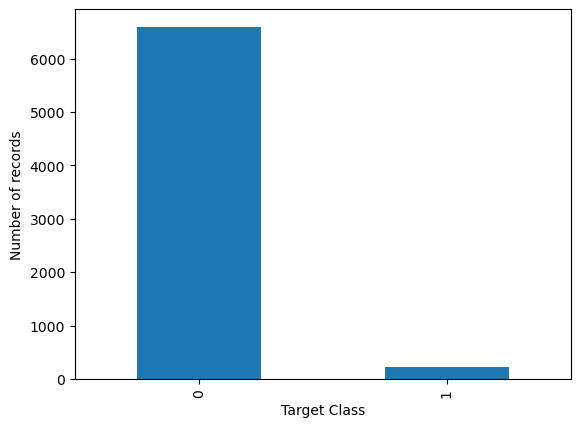

In [22]:
# Bar Graph for Imbalanced data

import matplotlib.pyplot as plt
count = data[target].value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()


# Balancing the data

In [14]:
# Defining the random oversample object
oversample = RandomOverSampler(random_state=1)

# Creating the new dataset with balanced classes
X_over, y_over = oversample.fit_resample(data[predictors], data[target])


print(y_over.value_counts())

1    6599
0    6599
Name: Bankrupt, dtype: int64


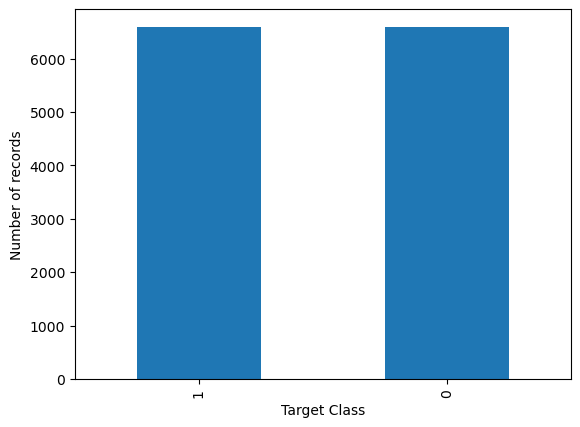

In [15]:
# Bar Graph for balanced data

import matplotlib.pyplot as plt
count = y_over.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()


In [16]:
train_df.head(5)

,Bankrupt,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
3392,0,81,602,973,767,2.500000e+01,2.400000e+01,411,0.0,0,...,22,0,1.920000e+12,623,813,278,26,565,1000,37
2755,0,528,610,999,797,0.000000e+00,5.400000e+12,470,0.0,254,...,38,0,2.000000e+00,623,841,277,26,565,1000,42
4442,0,568,631,999,797,0.000000e+00,0.000000e+00,479,0.0,59,...,14,0,0.000000e+00,623,843,276,26,565,1000,68
4267,0,474,603,998,797,0.000000e+00,0.000000e+00,459,0.0,573,...,144,0,2.000000e+00,623,840,278,28,567,1000,35
4912,0,495,597,998,797,5.800000e+12,3.310000e+12,459,0.0,0,...,26,0,5.000000e+00,624,840,280,27,566,1000,26


In [17]:
data.dtypes

Bankrupt                                                      int64
 ROA(C) before interest and depreciation before interest      int64
 Operating Gross Margin                                       int64
 Operating Profit Rate                                        int64
 Pre-tax net Interest Rate                                    int64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                               int64
 Interest-bearing debt interest rate                        float64
 Tax rate (A)                                                 int64
 Net Value Per Share (B)                                      int64
 CFO to Assets                                                int64
 Cash Flow to Equity                                          int64
 Current Liability to Current Assets                          int64
 Liability-Assets Flag                          

## Standardize 

In [18]:
# create a standard scaler and fit it to the training set of predictors

scaler = preprocessing.StandardScaler()
cols_to_stdize = predictors

#Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array
test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object

## 7.0 Save the data

In [19]:
train_X = train_df[predictors]
train_y = train_df[target] # train_target is now a series objecttrain_df.to_csv
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

train_df.to_csv('FinancialData_train_df.csv', index=False)
train_X.to_csv('FinancialData_train_X.csv', index=False)
train_y.to_csv('FinancialData_train_y.csv', index=False)
test_df.to_csv('FinancialData_test_df.csv', index=False)
test_X.to_csv('FinancialData_test_X.csv', index=False)
test_y.to_csv('FinancialData_test_y.csv', index=False)